In [1]:
#Ensure that multiple outputs can be displayed below a single cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
### Define useful vars for the project

USERDIR="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/"
DATALOC=USERDIR+"/datasets"
DATASET1="histopathologic-cancer-detection"


## With the data unzipped in the appropriate location, begin exploring the datasets in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#review the sample and label data\

trainLabs=pd.read_csv("train_labels.csv")
trainLabs.head()

sampleSub=pd.read_csv("sample_submission.csv")
sampleSub.head()




,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0


['/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/fd0a060ef9c30c9a83f6b4bfb568db74b099154d.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/1f9ee06f06d329eb7902a2e03ab3835dd0484581.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/19709bec800f372d0b1d085da6933dd3ef108846.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/7a34fc34523063f13f0617f7518a0330f6187bd3.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/93be720ca2b95fe2126cf2e1ed752bd759e9b0ed.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/761dde7de22cb39a0dd67ce472163d66e5ac1568.tif']

array([[[222, 188, 225],
        [225, 195, 229],
        [226, 201, 231],
        ...,
        [231, 228, 235],
        [234, 231, 240],
        [234, 231, 240]],

       [[232, 178, 227],
        [219, 167, 213],
        [214, 167, 211],
        ...,
        [238, 233, 240],
        [233, 225, 236],
        [227, 219, 230]],

       [[252, 180, 243],
        [237, 166, 226],
        [241, 172, 229],
        ...,
        [237, 221, 234],
        [235, 219, 232],
        [231, 213, 227]],

       ...,

       [[227, 143, 203],
        [216, 130, 193],
        [210, 121, 189],
        ...,
        [207, 164, 244],
        [103,  68, 152],
        [ 95,  65, 153]],

       [[189, 122, 176],
        [219, 148, 206],
        [228, 149, 214],
        ...,
        [176, 130, 218],
        [ 96,  58, 143],
        [ 96,  67, 151]],

       [[242, 188, 240],
        [248, 187, 244],
        [240, 168, 232],
        ...,
        [166, 117, 208],
        [ 74,  34, 120],
        [ 75,  43, 126]]

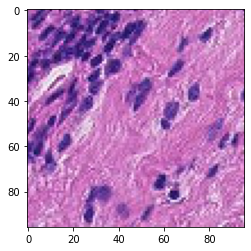

In [4]:
## begin by loading a small subset of the patches in the kaggle dataset
from skimage import io
import glob

testFilesLoc="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test"


imlocs = [f for f in glob.glob(testFilesLoc+"/*.tif")]
imlocs_small=imlocs[0:6]
imlocs_small

imfiles_small=[]

for imloc in imlocs_small: 
    imfiles_small.append(io.imread(imloc))
    
imfiles_small[1]
plt.imshow(imfiles_small[0])